In [18]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC 

#import models LSTM, CNN, simpleRNN
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model


from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import SimpleRNN, Dense

  
# To ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

import yfinance as yf
plt.style.use('seaborn-darkgrid') 

In [2]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

In [3]:
# Get the data for the stock S&P 500 index fund data
start = '2013-01-01'
end = '2023-12-31'
ticker_symbol = 'SPY'

df = yf.download(ticker_symbol, start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,145.110001,146.149994,144.729996,146.059998,119.492004,192059000
2013-01-03,145.990005,146.369995,145.339996,145.729996,119.222038,144761800
2013-01-04,145.970001,146.610001,145.669998,146.369995,119.745605,116817700
2013-01-07,145.850006,146.110001,145.429993,145.970001,119.418350,110002500
2013-01-08,145.710007,145.910004,144.979996,145.550003,119.074768,121265100
...,...,...,...,...,...,...
2023-12-22,473.859985,475.380005,471.700012,473.649994,473.649994,67126600
2023-12-26,474.070007,476.579987,473.989990,475.649994,475.649994,55387000
2023-12-27,475.440002,476.660004,474.890015,476.510010,476.510010,68000300


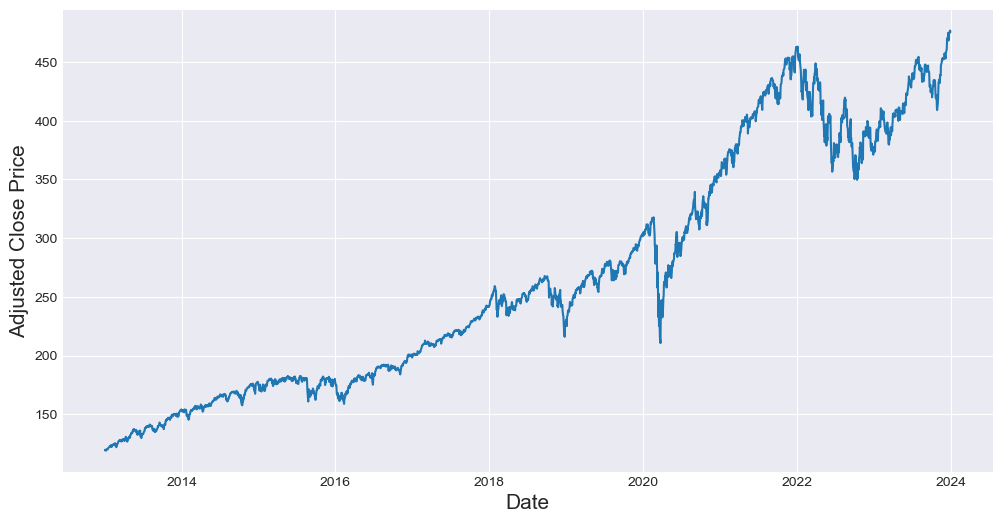

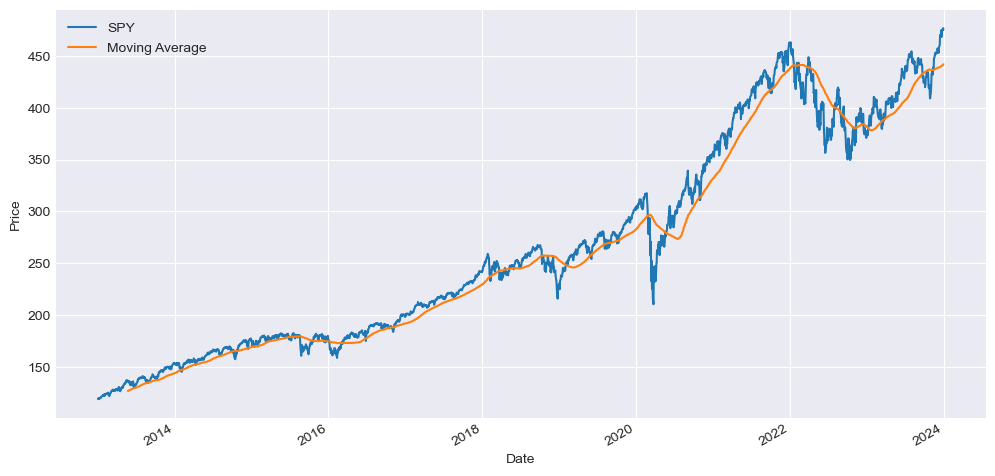

In [4]:
plt.figure(figsize = (12,6))
plt.plot(df["Adj Close"])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price',fontsize=15)
plt.show()


# Rolling mean
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

plt.figure(figsize = (12,6))
close_px.plot(label='SPY')
mavg.plot(label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [5]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])

#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [6]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2013-01-02,0.000000,0.000718,0.000000,0.352768
2013-01-03,0.002634,0.001377,0.001840,0.255643
2013-01-04,0.002574,0.002095,0.002835,0.198260
2013-01-07,0.002215,0.000599,0.002111,0.184265
2013-01-08,0.001796,0.000000,0.000754,0.207393


In [7]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [8]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [9]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
315/315 [==============================] - 2s 2ms/step - loss: 68189.9922
Epoch 2/100
315/315 [==============================] - 0s 2ms/step - loss: 59214.2461
Epoch 3/100
315/315 [==============================] - 0s 2ms/step - loss: 46045.0742
Epoch 4/100
315/315 [==============================] - 0s 2ms/step - loss: 31167.6504
Epoch 5/100
315/315 [==============================] - 0s 2ms/step - loss: 17962.3477
Epoch 6/100
315/315 [==============================] - 0s 2ms/step - loss: 8708.2646
Epoch 7/100
315/315 [==============================] - 1s 2ms/step - loss: 3447.8164
Epoch 8/100
315/315 [==============================] - 0s 2ms/step - loss: 1140.8722
Epoch 9/100
315/315 [==============================] - 0s 2ms/step - loss: 406.1897
Epoch 10/100
315/315 [==============================] - 0s 2ms/step - loss: 243.9006
Epoch 11/100
315/315 [==============================] - 1s 2ms/step - loss: 209.0402
Epoch 12/100
315/315 [==============================] - 0s 2m

315/315 [==============================] - 1s 2ms/step - loss: 15.1743
Epoch 99/100
315/315 [==============================] - 0s 2ms/step - loss: 15.1407
Epoch 100/100
315/315 [==============================] - 0s 2ms/step - loss: 15.1091


In [11]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

8/8 [==============================] - 0s 4ms/step


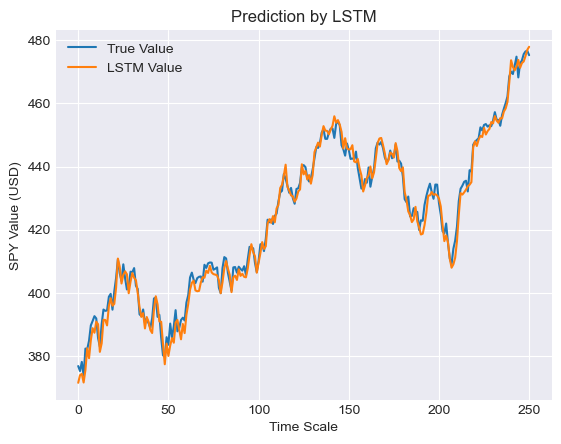

In [16]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('SPY Value (USD)')
plt.legend()
plt.show()

In [13]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 7.462241293480286
MAE: 2.2277857563885086


Epoch 1/20
158/158 - 1s - loss: 71060.2891 - 910ms/epoch - 6ms/step
Epoch 2/20
158/158 - 0s - loss: 68854.8906 - 212ms/epoch - 1ms/step
Epoch 3/20
158/158 - 0s - loss: 64500.9375 - 233ms/epoch - 1ms/step
Epoch 4/20
158/158 - 0s - loss: 58393.4219 - 187ms/epoch - 1ms/step
Epoch 5/20
158/158 - 0s - loss: 51082.9023 - 182ms/epoch - 1ms/step
Epoch 6/20
158/158 - 0s - loss: 43130.0469 - 178ms/epoch - 1ms/step
Epoch 7/20
158/158 - 0s - loss: 35051.4141 - 188ms/epoch - 1ms/step
Epoch 8/20
158/158 - 0s - loss: 27381.7754 - 192ms/epoch - 1ms/step
Epoch 9/20
158/158 - 0s - loss: 20471.0859 - 169ms/epoch - 1ms/step
Epoch 10/20
158/158 - 0s - loss: 14587.6406 - 171ms/epoch - 1ms/step
Epoch 11/20
158/158 - 0s - loss: 9858.7734 - 173ms/epoch - 1ms/step
Epoch 12/20
158/158 - 0s - loss: 6273.3853 - 207ms/epoch - 1ms/step
Epoch 13/20
158/158 - 0s - loss: 3764.2742 - 179ms/epoch - 1ms/step
Epoch 14/20
158/158 - 0s - loss: 2135.4065 - 176ms/epoch - 1ms/step
Epoch 15/20
158/158 - 0s - loss: 1165.8445 - 19

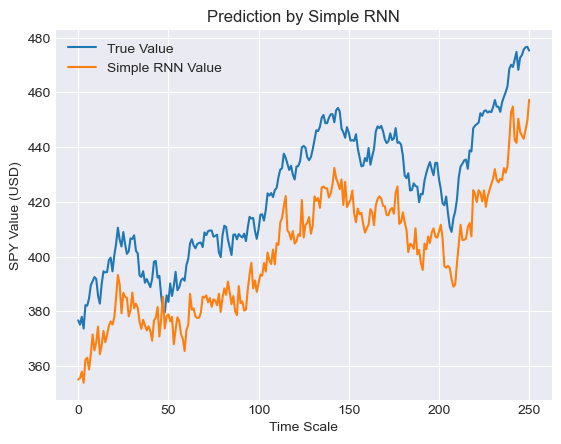

In [31]:
# Build a simple RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=2)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model without scaling predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Simple RNN Value')
plt.title('Prediction by Simple RNN')
plt.xlabel('Time Scale')
plt.ylabel('SPY Value (USD)')
plt.legend()
plt.show()

array([[353.0066 ],
       [353.372  ],
       [355.84113],
       [351.7297 ],
       [360.43405],
       [360.71442],
       [356.4035 ],
       [362.0619 ],
       [369.32184],
       [363.24725],
       [366.15338],
       [372.27454],
       [362.13602],
       [365.40305],
       [370.50058],
       [366.10608],
       [369.04346],
       [372.22284],
       [373.72272],
       [372.66925],
       [375.40967],
       [382.72168],
       [390.84662],
       [387.2872 ],
       [376.56146],
       [384.31155],
       [382.696  ],
       [382.33563],
       [375.55704],
       [377.78717],
       [384.36725],
       [378.36606],
       [380.2005 ],
       [378.92685],
       [373.75903],
       [371.24567],
       [374.67413],
       [372.71286],
       [370.6287 ],
       [372.29187],
       [370.64288],
       [366.9774 ],
       [374.39902],
       [375.07272],
       [379.43164],
       [368.36035],
       [375.3335 ],
       [383.87866],
       [372.15796],
       [376.4244 ],


array([[[0.        , 0.00071838, 0.        , 0.3527681 ]],

       [[0.00263388, 0.00137693, 0.00183996, 0.25564347]],

       [[0.002574  , 0.00209536, 0.00283535, 0.19826036]],

       ...,

       [[0.7113825 , 0.71015052, 0.70859346, 0.06441449]],

       [[0.70701262, 0.710869  , 0.69885081, 0.10399214]],

       [[0.70192453, 0.71374262, 0.70687413, 0.09590013]]])

In [67]:
## Build a simple 1D CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=2)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Plot the actual vs. predicted prices without scaling
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', linewidth=2)
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title('CNN Prediction for SPY with Multiple Features (No Output Scaling)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_13. Consider increasing the input size. Received input shape [None, 1, 1] which would produce output shape with a zero or negative value in a dimension.

In [14]:
#Prediction error
error = np.transpose(y_pred) - y_test

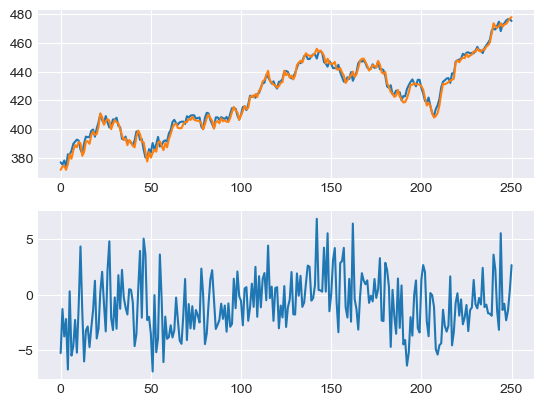

In [15]:
plt.figure(1)
plt.subplot(211)
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')

plt.subplot(212)
plt.plot(np.transpose(error), label='Error')

plt.show()